In [118]:
import urllib.request
import zipfile

from keras.utils import image_dataset_from_directory
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Resizing, Rescaling
from keras.models import Model
from keras.regularizers import l2
from keras.constraints import unit_norm
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Plantearemos las imágenes en directorios diferentes

In [120]:
# URLs de los datasets
# url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
# val_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

# Nombres de los archivos zip
# file_name = "horse-or-human.zip"
# validation_file_name = "validation-horse-or-human.zip"

# Directorios donde se guardarán las imágenes
# training_dir = 'horse-or-human/training'
# validation_dir = 'horse-or-human/validation'

# Descargar los datasets
# urllib.request.urlretrieve(url, file_name)
# urllib.request.urlretrieve(val_url, validation_file_name)

In [121]:
# zip_ref = zipfile.ZipFile(file_name, 'r')  
# zip_ref.extractall(training_dir) # --> entrenamiento            
#zip_ref.close()                        

#zip_ref = zipfile.ZipFile(validation_file_name, 'r')
#zip_ref.extractall(validation_dir) # --> validación       
#zip_ref.close()                                   

In [122]:
# Queremos que nos haga el etiquetado automaticamente:

# Crear el dataset de entrenamiento
#set_training = image_dataset_from_directory(
#   training_dir, 
#   color_mode="rgb",
#   image_size=(300, 300),       # Redimensionar todas las imágenes a 300x300 píxeles
#   batch_size=10,               # Procesar 10 imágenes a la vez
#   shuffle=True                 # Mezclar aleatoriamente las imágenes
#)

# Crear el dataset de validación
#set_validation = image_dataset_from_directory(
#   validation_dir, 
#   color_mode="rgb",
#   image_size=(300, 300),   
#   batch_size=10,           
#   shuffle=True               
#)

In [123]:
# Visualizamos una imagen:
#a = next(iter(set_training))

#img = a[0].numpy()[0]
#img = img.astype(int) 
#plt.imshow(img)
#print(a[1].numpy()[0])

## Otro método para crear training y validación, pero ahora solo tenemos 1 directorio. Hemos metido todas las imágenes en un mismo directorio

In [125]:
set2_training = image_dataset_from_directory(
   training_dir,                  
   color_mode="rgb",          
   image_size=(300, 300), 
   label_mode="binary",             # Etiquetas binarias (0 o 1)
   batch_size=10,
   shuffle=True,                
   validation_split=0.2,            # 20% para validación
   subset="training",               # Usar subset de entrenamiento
   seed=123             
)

Found 1027 files belonging to 2 classes.
Using 822 files for training.


In [126]:
# Crear el dataset de validación
set2_validation = image_dataset_from_directory(
   training_dir,                  
   color_mode="rgb",             
   image_size=(300, 300),      
   label_mode="binary",      
   batch_size=10,            
   shuffle=True,          
   validation_split=0.2,            
   subset="validation",             # Usar subset de validación
   seed=123      
)

Found 1027 files belonging to 2 classes.
Using 205 files for validation.


In [127]:

set2_test = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    color_mode="rgb",    
    image_size=(300, 300),
    batch_size=10,       
    shuffle=True     
)

Found 256 files belonging to 2 classes.


In [128]:
modelo = Sequential([
    Resizing(300, 300, input_shape=(None, None, 3)),
    Rescaling(1./255),
    
    Conv2D(16, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_constraint=unit_norm()),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_5 (Resizing)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
modelo.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = "binary_crossentropy",        
    metrics = ["accuracy"]            
)

In [130]:
history = modelo.fit(
    set2_training,        
    epochs = 10,             
    validation_data = set2_validation  
)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5982 - loss: 1.9815 - val_accuracy: 0.9512 - val_loss: 1.4164
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9041 - loss: 1.4239 - val_accuracy: 0.9659 - val_loss: 1.1557
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9178 - loss: 1.2375 - val_accuracy: 0.9805 - val_loss: 1.0356
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - accuracy: 0.9693 - loss: 1.0500 - val_accuracy: 0.9951 - val_loss: 0.9429
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.9689 - loss: 0.9509 - val_accuracy: 0.9756 - val_loss: 0.8907
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 44s 323ms/step - accuracy: 0.9775 - loss: 0.8940 - val_accuracy: 0.9951 - val_loss: 0.8167
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 57s 512ms/step - accuracy: 0.9734 - loss: 0.8293 - val_accuracy: 0.9951 - val_loss: 0.7660
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 558ms/step - accuracy: 0.9884 - loss: 0.7638 - val_accur

## EJERCICIO

In [132]:
# Importaciones necesarias
import urllib.request
import zipfile
from keras.utils import image_dataset_from_directory
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Resizing, Rescaling
from keras.models import Sequential
from keras.regularizers import l2
from keras.constraints import unit_norm
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# URLs de los datasets (descomentar para descargar)
# url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
# val_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

# Nombres de los archivos zip
# file_name = "horse-or-human.zip"
# validation_file_name = "validation-horse-or-human.zip"

# Directorios para las imágenes
training_dir = 'horse-or-human/training'
validation_dir = 'horse-or-human/validation'

In [134]:
# Crear dataset de entrenamiento
set2_training = image_dataset_from_directory(
    training_dir,
    color_mode="rgb",
    image_size=(300, 300),
    label_mode="binary",
    batch_size=10,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123
)

Found 1027 files belonging to 2 classes.
Using 822 files for training.


In [135]:
# Crear dataset de validación
set2_validation = image_dataset_from_directory(
    training_dir,
    color_mode="rgb",
    image_size=(300, 300),
    label_mode="binary",
    batch_size=10,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 1027 files belonging to 2 classes.
Using 205 files for validation.


In [136]:
# Crear dataset de prueba
set2_test = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    color_mode="rgb",
    image_size=(300, 300),
    batch_size=10,
    shuffle=True
)

Found 256 files belonging to 2 classes.


In [137]:
# Crear el modelo
modelo = Sequential([
    Resizing(300, 300, input_shape=(None, None, 3)),
    Rescaling(1./255),
    
    Conv2D(16, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_regularizer=l2(0.01)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu", kernel_constraint=unit_norm()),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

In [138]:
# Mostrar el resumen del modelo
modelo.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_6 (Resizing)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Compilar el modelo
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [140]:
# Entrenar el modelo
history = modelo.fit(
    set2_training,
    epochs=10,
    validation_data=set2_validation
)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.5952 - loss: 1.9716 - val_accuracy: 0.8488 - val_loss: 1.5078
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8632 - loss: 1.4949 - val_accuracy: 0.9463 - val_loss: 1.1856
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9186 - loss: 1.2231 - val_accuracy: 0.9707 - val_loss: 1.0469
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.9642 - loss: 1.0403 - val_accuracy: 0.9463 - val_loss: 0.9827
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 564ms/step - accuracy: 0.9737 - loss: 0.9389 - val_accuracy: 0.9902 - val_loss: 0.8688
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 75s 466ms/step - accuracy: 0.9683 - loss: 0.8738 - val_accuracy: 0.9707 - val_loss: 0.8336
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 464ms/step - accuracy: 0.9834 - loss: 0.8092 - val_accuracy: 0.9854 - val_loss: 0.7710
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 500ms/step - accuracy: 0.9926 - loss: 0.7488 - val_accu

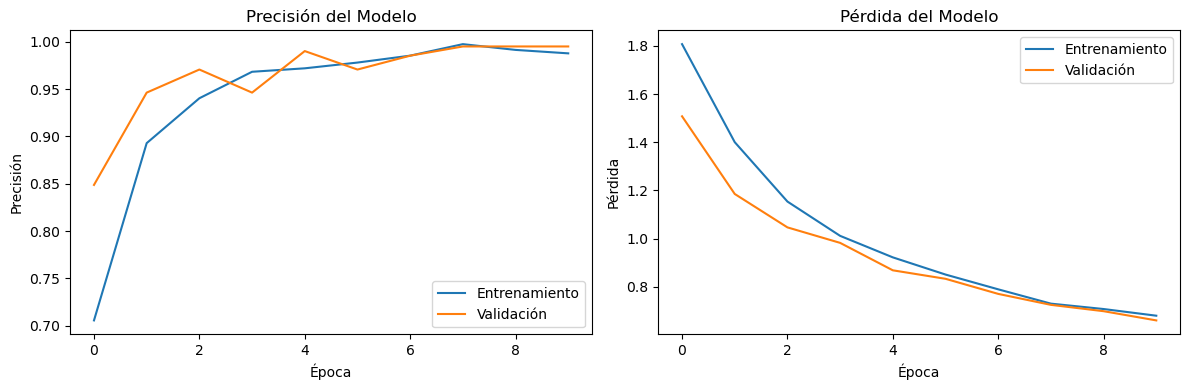

In [141]:
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [142]:
# Evaluación en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(set2_test)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7897 - loss: 2.4595

Precisión en el conjunto de prueba: 0.8164


In [143]:
# Guardar el modelo
modelo.save('models/horses_humans_cnn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 10 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

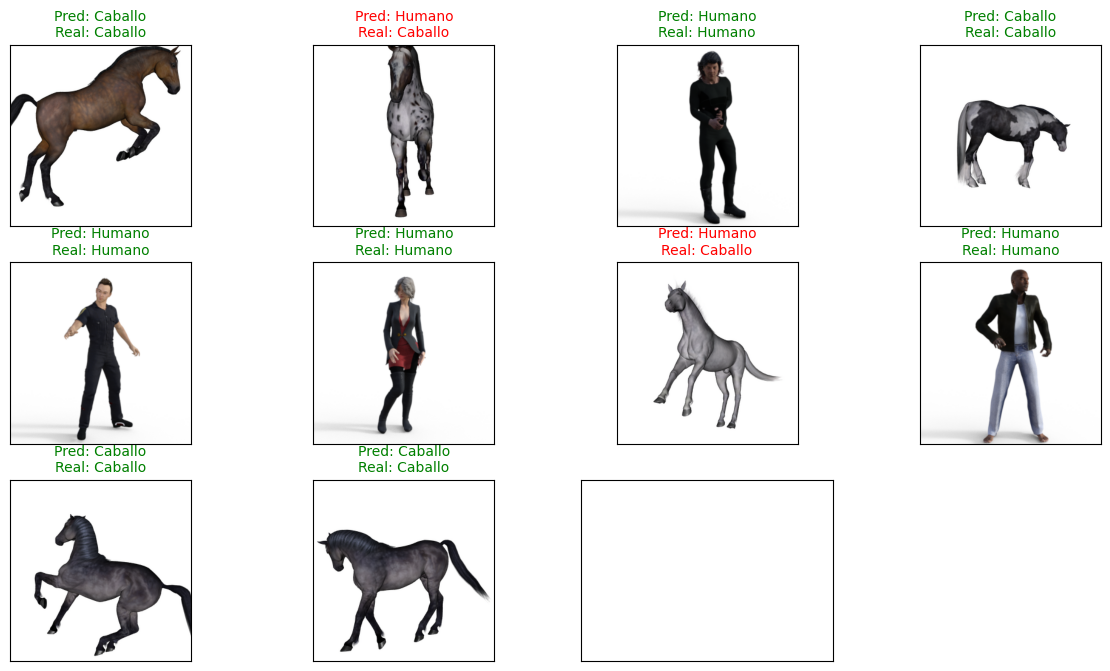

In [144]:
# Obtener un batch de imágenes de prueba
test_batch = next(iter(set2_test))
test_images = test_batch[0]
test_labels = test_batch[1]

# Realizar predicciones
predictions = modelo.predict(test_images)

# Crear una figura para mostrar las imágenes y predicciones
plt.figure(figsize=(15, 8))

# Mostrar las primeras 12 imágenes con sus predicciones
for i in range(12):
    plt.subplot(3, 4, i+1)
    
    # Eliminar los ejes
    plt.xticks([])
    plt.yticks([])
    
    # Mostrar la imagen
    plt.imshow(test_images[i].numpy().astype("uint8"))
    
    # Determinar la etiqueta predicha
    predicted_label = "Humano" if predictions[i] > 0.5 else "Caballo"
    true_label = "Humano" if test_labels[i] == 1 else "Caballo"
    
    # Color verde si es correcto, rojo si es incorrecto
    color = 'green' if predicted_label == true_label else 'red'
    
    # Añadir el título con la predicción
    plt.title(f'Pred: {predicted_label}\nReal: {true_label}', 
              color=color, 
              fontsize=10)

plt.tight_layout()
plt.show()

# Imprimir algunas estadísticas de las predicciones
correct_predictions = sum(((predictions > 0.5) == test_labels).numpy())
total_predictions = len(predictions)
print(f"\nPredicciones correctas: {correct_predictions} de {total_predictions}")
print(f"Precisión en este batch: {(correct_predictions/total_predictions)*100:.2f}%")

# Para ver las probabilidades detalladas de algunas predicciones
print("\nProbabilidades detalladas de las primeras 5 predicciones:")
for i in range(5):
    true_label = "Humano" if test_labels[i] == 1 else "Caballo"
    prob = predictions[i][0]
    print(f"Imagen {i+1}: {prob:.4f} ({true_label}) -> {'Humano' if prob > 0.5 else 'Caballo'}")